# Growth Limiation - 
1. find what areas around the Arctic are limited by what, and 
2. see how you can plot difference plots or show how these differ between high and low temp, ice and NO$_3$ years. 

In [1]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
#import hvplot.xarray
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy

In [2]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

In [3]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [4]:
path = '/glade/campaign/cesm/development/bgcwg/projects/marbl-spectra/GNG595_2ndcycle_1990-2009_clim'
files = sorted(glob.glob(f'{path}/*.nc', recursive=True),key=numericalSort)
ds= xr.open_mfdataset(files,combine='by_coords')

In [5]:
diat3 = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_limitation.nc')
pp = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/growth_lim/pp_limitation.nc')

	NC4_open: path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_limitation.nc mode 4096 params 0
	HDF5 error messages turned on.
			nc4_open_file: path /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_limitation.nc mode 4096
			nc4_grp_list_add: name / 
			nc4_rec_read_metadata: grp->hdr.name /
			found dataset month
			found dataset nlat
			found dataset nlon
			found dataset TLONG
			found dataset TLAT
			found dataset time
			found dataset diat3_lim_value
			found dataset diat3_lim_index
ERROR: Invalid _NCProperties attribute
		*** NetCDF-4 Internal Metadata: int_ncid 0xd0000 ext_ncid 0xd0000
		FILE - path: /glade/u/home/gabyn/scratch/SPECTRA/growth_lim/diat3_limitation.nc cmode: 0x1008 parallel: 0 redef: 0 fill_mode: 0 no_write: 1 next_nc_grpid: 1
		 GROUP - / nc_grpid: 0 nvars: 6 natts: 0
		 DIMENSION - dimid: 0 name: month len: 12 unlimited: 0
		 DIMENSION - dimid: 1 name: nlat len: 384 unlimited: 0
		 DIMENSION - dimid: 2 name: nlon len: 320 unlimited: 0
		 DIMENSION - 

In [6]:
# colors for each variable 
# temperature (Blue)
temperature3 = ''
temperature2        = '#e0f3f8'
temperature1       = '#abd9e9'
temperature       = '#74add1'
# light (yellow)
light   = '#fdae61'
light1   ='#fee090'
light2   ='#ffffbf'
light3=''
# nutrients (Green)
nitrate2     = '#AFE1AF'
nitrate1     ='#00A36C'
nitrate     ='#097969'

from matplotlib.colors import LinearSegmentedColormap
color_temp = [temperature,temperature1,temperature2]
color_light = [light,light1,light2]
color_nutrients = [nitrate,nitrate1,nitrate2]

cmap_name = 'my_list'
cm_temp = LinearSegmentedColormap.from_list(
        cmap_name, color_temp, N=3)
cm_light = LinearSegmentedColormap.from_list(
        cmap_name, color_light, N=3)
cm_nutrients = LinearSegmentedColormap.from_list(
        cmap_name, color_nutrients, N=3)

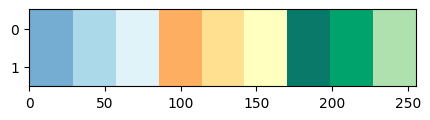

In [7]:
N = 3 # number of colors to extract from each of the base_cmaps below
phyto = [cm_temp,cm_light,cm_nutrients]

n_base = len(phyto)
# we go from 0.2 to 0.8 below to avoid having several whites and blacks in the resulting cmaps
colors_phyto = np.concatenate([plt.get_cmap(name)(np.linspace(0,1,N)) for name in phyto])
cm_phyto = mpl.colors.ListedColormap(colors_phyto)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(1,1,figsize=(5,1))
ax.imshow(gradient, aspect='auto', cmap=cm_phyto)

## Final Figure (picoplankton on top row and large diatom in the bottom row). 

		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_dim: ncid 0xe0000 dimid 1
		NC4_inq_dim: ncid 0xe0000 dimid 0
		NC4_inq_dim: ncid 0xe0000 dimid 2
		NC4_inq_dim: ncid 0xe0000 dimid 3
		NC4_inq_var_all: ncid 0xe0000 varid 4
			NC4_get_vars: var->hdr.name pp_lim_value mem_nc_type 6
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_inq_var_all: ncid 0xe0000 varid 4
		NC4_

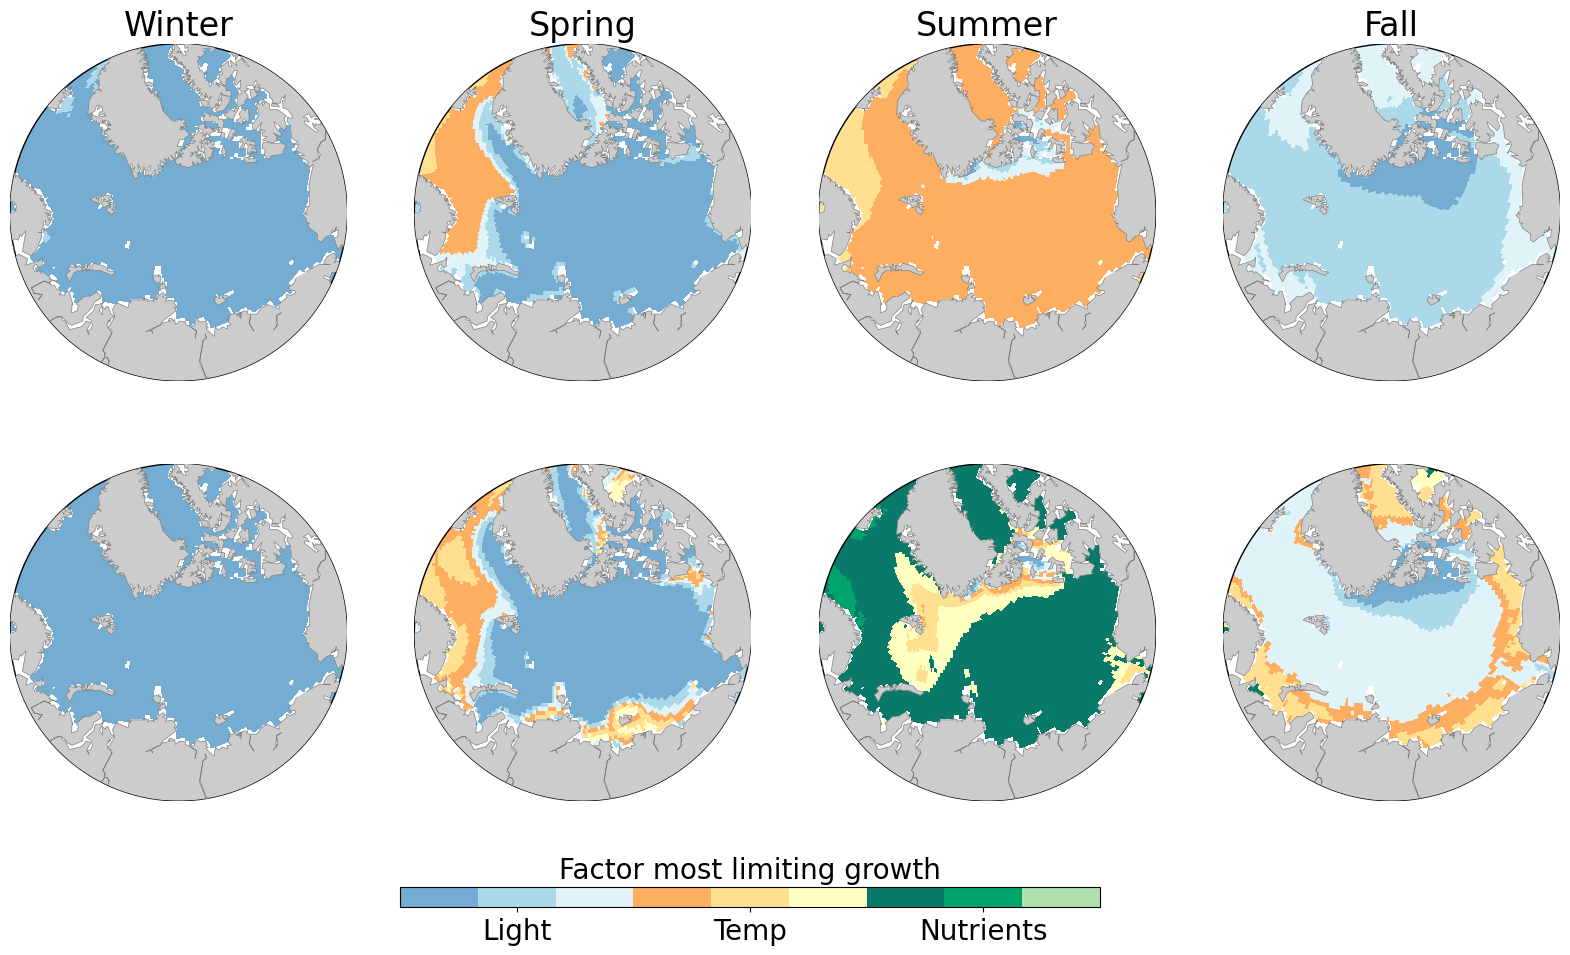

<Figure size 640x480 with 0 Axes>

In [10]:
fig = plt.figure(figsize=(20,10))
# ------------------------- Picoplankton ---------------------------
# Winter 
ax = fig.add_subplot(241) 
ax.set_title("Winter",fontsize=24)
pp_lims = (pp.pp_lim_value.where(pp.pp_lim_value < 0.9) + pp.pp_lim_index.where(pp.pp_lim_value < 0.9))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(pp_lims[:,list(range(2)) + [-1],:,:], axis=(0,1)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm_phyto, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(242) 
ax.set_title("Spring",fontsize=24)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(pp_lims[:,2:5,:,:], axis=(0,1)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm_phyto, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(243) 
ax.set_title("Summer",fontsize=24)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(pp_lims[:,5:8,:,:], axis=(0,1)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm_phyto, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(244) 
ax.set_title("Fall",fontsize=24)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(pp_lims[:,8:11,:,:], axis=(0,1)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm_phyto, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# ------------------------- Large diatoms ---------------------------
# Winter
ax = fig.add_subplot(245)
diat3_lims = (diat3.diat3_lim_value.where(diat3.diat3_lim_value < 0.9) + diat3.diat3_lim_index.where(diat3.diat3_lim_value < 0.9))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat3_lims[:,list(range(2)) + [-1],:,:], axis=(0,1)))
x, y = m(tlon,tlat)
cff = m.pcolormesh(x,y,winter,cmap=cm_phyto, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(246) 
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat3_lims[:,2:5,:,:], axis=(0,1)))
x, y = m(tlon,tlat)
cff = m.pcolormesh(x,y,spring,cmap=cm_phyto, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(247)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat3_lims[:,5:8,:,:], axis=(0,1)))
x, y = m(tlon,tlat)
cff = m.pcolormesh(x,y,summer,cmap=cm_phyto, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(248) 
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat3_lims[:,8:11,:,:], axis=(0,1)))
x, y = m(tlon,tlat)
cff = m.pcolormesh(x,y,fall,cmap=cm_phyto, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

cbar_ax = fig.add_axes([0.32, 0.01, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5],orientation="horizontal")
cbar.ax.set_xticklabels(['Light','Temp', 'Nutrients'], fontsize = 20)
cbar.ax.set_title('Factor most limiting growth', fontsize = 20)
m.plot
plt.show()
plt.tight_layout()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_growth_limitation_pp_vs_diat3_20yrclim.png', dpi=600, bbox_inches='tight')

# High vs Low temp, ice and NO3. 
- High: years on the 90th percentile 
- Low: years on the 10th percentile

## High vs Low temperature 

In [ ]:
%%time
temp_ds_inter = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/nc_files/temp_ds_inter_surface.nc');

In [ ]:
## Calculate climatology for each grid cell
temp_ao_clim = np.nanmean(temp_ds_inter.TEMP,axis=0) # Size (384,320)
temp_ds = np.array(temp_ds_inter.TEMP)

In [ ]:
%%time
# For every grid cell in the Arctic Ocean 
# Create empty arrays filled with NaN's 
temp_arctic_anom = np.empty([62,12,384,320]) ; temp_arctic_anom[:] = np.nan

# Loop through the latitudes and longitudes to calculate anomalies and error values. 
for latitude in np.arange(0,384,1):
    for longitude in np.arange(0,320,1):
        temp_arctic_anom[:,:,latitude,longitude] = temp_ds[:,:,latitude,longitude]-temp_ao_clim[:,latitude,longitude]

In [ ]:
%%time
temp_arctic_anom_yearly = np.nanmean(temp_arctic_anom,axis=1) # size is now (62,384,320)

# Create empty arrays filled with NaN's 
pcen_90 = np.empty([384,320]) ; pcen_90[:] = np.nan
pcen_10 = np.empty([384,320]) ; pcen_10[:] = np.nan

# Loop through the latitudes and longitudes to calculate anomalies and error values. 
for latitude in np.arange(0,384,1):
    for longitude in np.arange(0,320,1):
    # index of array entry nearest to percentile value
        pcen_90[latitude,longitude]=np.nanpercentile(temp_arctic_anom_yearly[:,latitude,longitude],90,interpolation='nearest')
        pcen_10[latitude,longitude]=np.nanpercentile(temp_arctic_anom_yearly[:,latitude,longitude],10,interpolation='nearest')

In [ ]:
%%time
# Python3 code to demonstrate working of
# Creating Multidimensional dictionary
# Using defaultdict()
from collections import defaultdict
 
# Utility function to create dictionary
def multi_dict(K, type):
    if K == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: multi_dict(K-1, type))
 
# Initialize dictionary
low_temp_years_arctic = {}
high_temp_years_arctic = {}
 
# Using defaultdict()
# Creating Multidimensional dictionary
# calling function
low_temp_years_arctic = multi_dict(2, int)
high_temp_years_arctic = multi_dict(2, int)
for latitude in np.arange(0,384,1):
    for longitude in np.arange(0,320,1):
        low_temp_years_arctic[latitude][longitude] = np.where(temp_arctic_anom_yearly[:,latitude,longitude] < pcen_10[latitude,longitude])
        high_temp_years_arctic[latitude][longitude] = np.where(temp_arctic_anom_yearly[:,latitude,longitude] > pcen_90[latitude,longitude])

In [ ]:
# Loop through the latitudes and longitudes to calculate anomalies and error values. 
low_temp_years_summer = np.empty([384,320]) ; low_temp_years_summer[:] = np.nan
high_temp_years_summer = np.empty([384,320]) ; high_temp_years_summer[:] = np.nan

low_temp_years_spring = np.empty([384,320]) ; low_temp_years_spring[:] = np.nan
high_temp_years_spring = np.empty([384,320]) ; high_temp_years_spring[:] = np.nan

low_temp_years_fall = np.empty([384,320]) ; low_temp_years_fall[:] = np.nan
high_temp_years_fall = np.empty([384,320]) ; high_temp_years_fall[:] = np.nan

low_temp_years_winter = np.empty([384,320]) ; low_temp_years_winter[:] = np.nan
high_temp_years_winter = np.empty([384,320]) ; high_temp_years_winter[:] = np.nan
for latitude in np.arange(0,384,1):
    for longitude in np.arange(0,320,1):
        low_temp_years_summer[latitude,longitude] = np.nanmean(phyto_zoo_frac_summer[low_temp_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1))
        high_temp_years_summer[latitude,longitude] = np.nanmean(phyto_zoo_frac_summer[high_temp_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 

        low_temp_years_spring[latitude,longitude] = np.nanmean(phyto_zoo_frac_spring[low_temp_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 
        high_temp_years_spring[latitude,longitude]= np.nanmean(phyto_zoo_frac_spring[high_temp_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 

        low_temp_years_fall[latitude,longitude] = np.nanmean(phyto_zoo_frac_fall[low_temp_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 
        high_temp_years_fall[latitude,longitude] = np.nanmean(phyto_zoo_frac_fall[high_temp_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1))

        low_temp_years_winter[latitude,longitude]= np.nanmean(phyto_zoo_frac_winter[low_temp_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 
        high_temp_years_winter[latitude,longitude] = np.nanmean(phyto_zoo_frac_winter[high_temp_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 
 

## Low vs high ice years 

In [ ]:
%%time
ECOSYS_IFRAC_ds_inter = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/nc_files/ECOSYS_IFRAC_ds_inter_surface.nc');

In [ ]:
## Calculate climatology for each grid cell
ice_ao_clim = np.nanmean(ECOSYS_IFRAC_ds_inter.ECOSYS_IFRAC,axis=0) # Size (12,384,320)
ECOSYS_IFRAC_ds = np.array(ECOSYS_IFRAC_ds_inter.ECOSYS_IFRAC)

In [ ]:
%%time
# For every grid cell in the Arctic Ocean 
# Create empty arrays filled with NaN's 
ice_arctic_anom = np.empty([62,12,384,320]) ; ice_arctic_anom[:] = np.nan

# Loop through the latitudes and longitudes to calculate anomalies and error values. 
for latitude in np.arange(0,384,1):
    for longitude in np.arange(0,320,1):
        ice_arctic_anom[:,:,latitude,longitude] = ECOSYS_IFRAC_ds[:,:,latitude,longitude]-ice_ao_clim[:,latitude,longitude]

In [ ]:
ice_arctic_anom_yearly = np.nanmean(ice_arctic_anom,axis=1) # size is now (62,180,360)

# Create empty arrays filled with NaN's 
pcen_90_ice = np.empty([384,320]) ; pcen_90_ice[:] = np.nan
pcen_10_ice = np.empty([384,320]) ; pcen_10_ice[:] = np.nan

# Loop through the latitudes and longitudes to calculate anomalies and error values. 
for latitude in np.arange(0,384,1):
    for longitude in np.arange(0,320,1):
    # index of array entry nearest to percentile value
        pcen_90_ice[latitude,longitude]=np.nanpercentile(ice_arctic_anom_yearly[:,latitude,longitude],90,interpolation='nearest')
        pcen_10_ice[latitude,longitude]=np.nanpercentile(ice_arctic_anom_yearly[:,latitude,longitude],10,interpolation='nearest')

In [ ]:
# Python3 code to demonstrate working of
# Creating Multidimensional dictionary
# Using defaultdict()
from collections import defaultdict
 
# Utility function to create dictionary
def multi_dict(K, type):
    if K == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: multi_dict(K-1, type))
 
# Initialize dictionary
low_ice_years_arctic = {}
high_ice_years_arctic = {}
 
# Using defaultdict()
# Creating Multidimensional dictionary
# calling function
low_ice_years_arctic = multi_dict(2, int)
high_ice_years_arctic = multi_dict(2, int)
for latitude in np.arange(0,384,1):
    for longitude in np.arange(0,320,1):
        low_ice_years_arctic[latitude][longitude] = np.where(ice_arctic_anom_yearly[:,latitude,longitude] < pcen_10_ice[latitude,longitude])
        high_ice_years_arctic[latitude][longitude] = np.where(ice_arctic_anom_yearly[:,latitude,longitude] > pcen_90_ice[latitude,longitude])

In [ ]:
%%time
# Loop through the latitudes and longitudes to calculate anomalies and error values.
low_ice_years_summer = np.empty([384,320]) ; low_ice_years_summer[:] = np.nan
high_ice_years_summer = np.empty([384,320]) ; high_ice_years_summer[:] = np.nan

low_ice_years_spring = np.empty([384,320]) ; low_ice_years_spring[:] = np.nan
high_ice_years_spring = np.empty([384,320]) ; high_ice_years_spring[:] = np.nan

low_ice_years_fall = np.empty([384,320]) ; low_ice_years_fall[:] = np.nan
high_ice_years_fall = np.empty([384,320]) ; high_ice_years_fall[:] = np.nan

low_ice_years_winter = np.empty([384,320]) ; low_ice_years_winter[:] = np.nan
high_ice_years_winter = np.empty([384,320]) ; high_ice_years_winter[:] = np.nan
for latitude in np.arange(0,384,1):
    for longitude in np.arange(0,320,1):
        low_ice_years_summer[latitude,longitude] = np.nanmean(phyto_zoo_frac_summer[low_ice_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1))
        high_ice_years_summer[latitude,longitude] = np.nanmean(phyto_zoo_frac_summer[high_ice_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 

        low_ice_years_spring[latitude,longitude] = np.nanmean(phyto_zoo_frac_spring[low_ice_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 
        high_ice_years_spring[latitude,longitude]= np.nanmean(phyto_zoo_frac_spring[high_ice_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 

        low_ice_years_fall[latitude,longitude] = np.nanmean(phyto_zoo_frac_fall[low_ice_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 
        high_ice_years_fall[latitude,longitude] = np.nanmean(phyto_zoo_frac_fall[high_ice_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1))

        low_ice_years_winter[latitude,longitude]= np.nanmean(phyto_zoo_frac_winter[low_ice_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 
        high_ice_years_winter[latitude,longitude] = np.nanmean(phyto_zoo_frac_winter[high_ice_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 
 

## Low vs high nutrient years

In [ ]:
%%time
NO3_ds_inter = xr.open_mfdataset('/glade/u/home/gabyn/scratch/SPECTRA/nc_files/NO3_ds_inter_surface.nc');

In [ ]:
%%time
## Calculate climatology for each grid cell
no3_ao_clim = np.nanmean(NO3_ds_inter.NO3,axis=0) # Size (12,384,320)

In [ ]:
NO3_ds = np.array(NO3_ds_inter.NO3)

In [ ]:
%%time
# For every grid cell in the Arctic Ocean 
# Create empty arrays filled with NaN's 
no3_arctic_anom = np.empty([62,12,384,320]) ; no3_arctic_anom[:] = np.nan

# Loop through the latitudes and longitudes to calculate anomalies and error values. 
for latitude in np.arange(0,384,1):
    for longitude in np.arange(0,320,1):
        no3_arctic_anom[:,:,latitude,longitude] = NO3_ds[:,:,latitude,longitude]-no3_ao_clim[:,latitude,longitude]

In [ ]:
%%time
no3_arctic_anom_yearly = np.nanmean(no3_arctic_anom,axis=1) # size is now (62,384,320)

# Create empty arrays filled with NaN's 
pcen_90_no3 = np.empty([384,320]) ; pcen_90_no3[:] = np.nan
pcen_10_no3 = np.empty([384,320]) ; pcen_10_no3[:] = np.nan

# Loop through the latitudes and longitudes to calculate anomalies and error values. 
for latitude in np.arange(0,384,1):
    for longitude in np.arange(0,320,1):
    # index of array entry nearest to percentile value
        pcen_90_no3[latitude,longitude]=np.nanpercentile(no3_arctic_anom_yearly[:,latitude,longitude],90,interpolation='nearest')
        pcen_10_no3[latitude,longitude]=np.nanpercentile(no3_arctic_anom_yearly[:,latitude,longitude],10,interpolation='nearest')

In [ ]:
# Python3 code to demonstrate working of
# Creating Multidimensional dictionary
# Using defaultdict()
from collections import defaultdict
 
# Utility function to create dictionary
def multi_dict(K, type):
    if K == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: multi_dict(K-1, type))
 
# Initialize dictionary
low_no3_years_arctic = {}
high_no3_years_arctic = {}
 
# Using defaultdict()
# Creating Multidimensional dictionary
# calling function
low_no3_years_arctic = multi_dict(2, int)
high_no3_years_arctic = multi_dict(2, int)
for latitude in np.arange(0,384,1):
    for longitude in np.arange(0,320,1):
        low_no3_years_arctic[latitude][longitude] = np.where(no3_arctic_anom_yearly[:,latitude,longitude] < pcen_10_no3[latitude,longitude])
        high_no3_years_arctic[latitude][longitude] = np.where(no3_arctic_anom_yearly[:,latitude,longitude] > pcen_90_no3[latitude,longitude])

In [ ]:
%%time
# Loop through the latitudes and longitudes to calculate anomalies and error values. 
low_no3_years_summer = np.empty([384,320]) ; low_no3_years_summer[:] = np.nan
high_no3_years_summer = np.empty([384,320]) ; high_no3_years_summer[:] = np.nan

low_no3_years_spring = np.empty([384,320]) ; low_no3_years_spring[:] = np.nan
high_no3_years_spring = np.empty([384,320]) ; high_no3_years_spring[:] = np.nan

low_no3_years_fall = np.empty([384,320]) ; low_no3_years_fall[:] = np.nan
high_no3_years_fall = np.empty([384,320]) ; high_no3_years_fall[:] = np.nan

low_no3_years_winter = np.empty([384,320]) ; low_no3_years_winter[:] = np.nan
high_no3_years_winter = np.empty([384,320]) ; high_no3_years_winter[:] = np.nan
for latitude in np.arange(0,384,1):
    for longitude in np.arange(0,320,1):
        low_no3_years_summer[latitude,longitude] = np.nanmean(phyto_zoo_frac_summer[low_no3_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1))
        high_no3_years_summer[latitude,longitude] = np.nanmean(phyto_zoo_frac_summer[high_no3_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 

        low_no3_years_spring[latitude,longitude] = np.nanmean(phyto_zoo_frac_spring[low_no3_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 
        high_no3_years_spring[latitude,longitude]= np.nanmean(phyto_zoo_frac_spring[high_no3_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 

        low_no3_years_fall[latitude,longitude] = np.nanmean(phyto_zoo_frac_fall[low_no3_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 
        high_no3_years_fall[latitude,longitude] = np.nanmean(phyto_zoo_frac_fall[high_no3_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1))

        low_no3_years_winter[latitude,longitude]= np.nanmean(phyto_zoo_frac_winter[low_no3_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 
        high_no3_years_winter[latitude,longitude] = np.nanmean(phyto_zoo_frac_winter[high_no3_years_arctic[latitude][longitude],latitude,longitude],axis=(0,1)) 
 

## Full Figure - showing all the interannual differences 

In [ ]:
from mpl_toolkits.basemap import Basemap
lev = np.arange(0, 10, 0.05)
norm = colors.TwoSlopeNorm(vmin=lev[0], vmax=lev[-1], vcenter=1)
fig = plt.figure(figsize=(20, 20))

#### 62 year average!!! 

# Winter TLeq = 3 (62yr average)
ax = fig.add_subplot(4, 4, 1)
lon, lat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(phyto_zoo_frac_winter,axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, winter, cmap='PiYG', vmin = 0, vmax = 10, norm=norm);
ax.set_title('Winter', fontsize=20)

# Spring TLeq = 3, (62yr average)
ax = fig.add_subplot(4, 4, 2)
lon, lat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(phyto_zoo_frac_spring,axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, spring, cmap='PiYG', vmin = 0, vmax = 10,norm=norm);
ax.set_title('Spring, grazing fraction', fontsize=20)

# Summer TLeq = 3, (62 yr average)
ax = fig.add_subplot(4, 4, 3)
lon, lat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(phyto_zoo_frac_summer,axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, summer, cmap='PiYG', vmin = 0, vmax = 15,norm=norm);
ax.set_title('Summer', fontsize=20)

# Fall TLeq = 3, (62 yr average)
ax = fig.add_subplot(4, 4, 4)
lon, lat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(phyto_zoo_frac_fall,axis=0))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, fall, cmap='PiYG',vmin = 0, vmax = 10,norm=norm);
cbar_ax = fig.add_axes([0.999, 0.79, 0.01, 0.15])
cb = fig.colorbar(cf, shrink=0.1, extend ='both',orientation='vertical', cax=cbar_ax)
ax.set_title('Fall', fontsize=20)
cb.ax.tick_params(labelsize=20)

########## Differences!!! 
vminn =-2
vmaxx=2
# Winter, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 5)
winter_temp_diff = high_temp_years_winter-low_temp_years_winter
lon, lat, w_diff = adjust_pop_grid(ds.TLONG, ds.TLAT, winter_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
x,y = m(lon, lat)
cf = m.pcolor(x, y, w_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Spring, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 6)
spring_temp_diff = high_temp_years_spring-low_temp_years_spring
lon, lat, sp_diff = adjust_pop_grid(ds.TLONG, ds.TLAT, spring_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, sp_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Summer, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 7)
summer_temp_diff = high_temp_years_summer-low_temp_years_summer
lon, lat, s_diff = adjust_pop_grid(ds.TLONG, ds.TLAT, summer_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, s_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Fall, % difference of catch from high and low temperature years. 
ax = fig.add_subplot(4, 4, 8)
fall_temp_diff = high_temp_years_fall-low_temp_years_fall
lon, lat, f_diff = adjust_pop_grid(ds.TLONG, ds.TLAT, fall_temp_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, f_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);
cbar_ax = fig.add_axes([0.999, 0.3, 0.01, 0.15])
cb = fig.colorbar(cf, shrink=0.1, extend ='both',orientation='vertical', cax=cbar_ax)
cb.ax.tick_params(labelsize=20)

## Ice Fraction

# Winter, % difference of catch from high and low ice fraction  years. 
ax = fig.add_subplot(4, 4, 9)
winter_ice_diff = high_ice_years_winter-low_ice_years_winter
lon, lat, w_diff = adjust_pop_grid(ds.TLONG, ds.TLAT, winter_ice_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, w_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Spring, % difference of catch from high and low ice fraction years. 
ax = fig.add_subplot(4, 4, 10)
spring_ice_diff = high_ice_years_spring-low_ice_years_spring
lon, lat, sp_diff = adjust_pop_grid(ds.TLONG, ds.TLAT, spring_ice_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, sp_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Summer, % difference of catch from high and low ice fraction  years. 
ax = fig.add_subplot(4, 4, 11)
summer_ice_diff = high_ice_years_summer-low_ice_years_summer
lon, lat, s_diff = adjust_pop_grid(ds.TLONG, ds.TLAT, summer_ice_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, s_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Fall, % difference of catch from high and low ice fraction  years. 
ax = fig.add_subplot(4, 4, 12)
fall_ice_diff = high_ice_years_fall-low_ice_years_fall
lon, lat, f_diff = adjust_pop_grid(ds.TLONG, ds.TLAT, fall_ice_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, f_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);
cbar_ax = fig.add_axes([0.999, 0.548, 0.01, 0.15])
cb = fig.colorbar(cf, shrink=0.1, extend ='both',orientation='vertical', cax=cbar_ax)
cb.ax.tick_params(labelsize=20)


# Winter, % difference of catch from high and low NO$_3$  years. 
ax = fig.add_subplot(4, 4, 13)
winter_no3_diff = high_no3_years_winter-low_no3_years_winter
lon, lat, w_diff = adjust_pop_grid(ds.TLONG, ds.TLAT, winter_no3_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, w_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);
cb.ax.tick_params(labelsize=20)

# Spring, % difference of catch from high and low NO$_3$ years. 
ax = fig.add_subplot(4, 4, 14)
spring_no3_diff = high_no3_years_spring-low_no3_years_spring
lon, lat, sp_diff = adjust_pop_grid(ds.TLONG, ds.TLAT, spring_no3_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, sp_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Summer, % difference of catch from high and low NO$_3$  years. 
ax = fig.add_subplot(4, 4, 15)
summer_no3_diff = high_no3_years_summer-low_no3_years_summer
lon, lat, s_diff = adjust_pop_grid(ds.TLONG, ds.TLAT, summer_no3_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, s_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);

# Fall, % difference of catch from high and low NO$_3$  years. 
ax = fig.add_subplot(4, 4, 16)
fall_no3_diff = high_no3_years_fall-low_no3_years_fall
lon, lat, f_diff = adjust_pop_grid(ds.TLONG, ds.TLAT, fall_no3_diff)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
cf = m.pcolor(x, y, f_diff, cmap='RdBu_r',vmin=vminn,vmax=vmaxx);
cbar_ax = fig.add_axes([0.9999, 0.065, 0.01, 0.15])
cb = fig.colorbar(cf, shrink=0.1, extend ='both',orientation='vertical', cax=cbar_ax)
cb.ax.tick_params(labelsize=20)
plt.tight_layout()

fig.savefig('/glade/u/home/gabyn/work/case_notes/analysis_figures/quarterly_grazing_fraction_interannual.png',dpi=200, bbox_inches='tight')